In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
loans=pd.read_csv('loan__data .csv')

In [14]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [16]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5,0,'FICO')

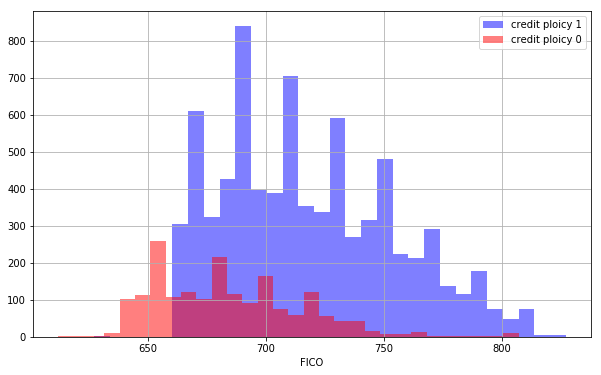

In [17]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=30,label='credit ploicy 1',color='blue',alpha=0.5)
loans[loans['credit.policy']==0]['fico'].hist(bins=30,label='credit ploicy 0',color='red',alpha=0.5)
plt.legend()
plt.xlabel('FICO')

Text(0.5,0,'FICO')

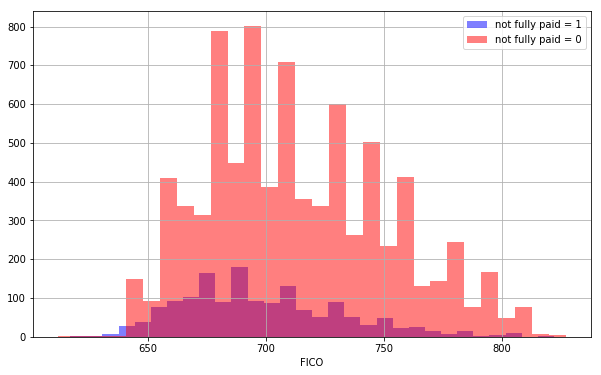

In [18]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(color='blue',label='not fully paid = 1',bins=30,alpha=0.5)
loans[loans['not.fully.paid']==0]['fico'].hist(color='red',label='not fully paid = 0',bins=30,alpha=0.5)
plt.legend()
plt.xlabel('FICO')


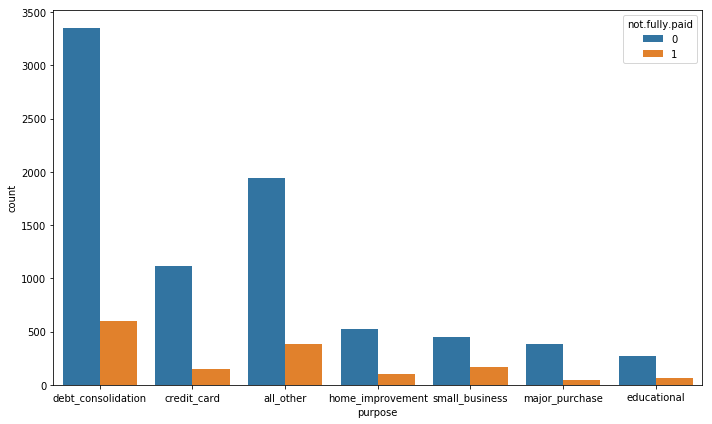

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid')
plt.tight_layout()


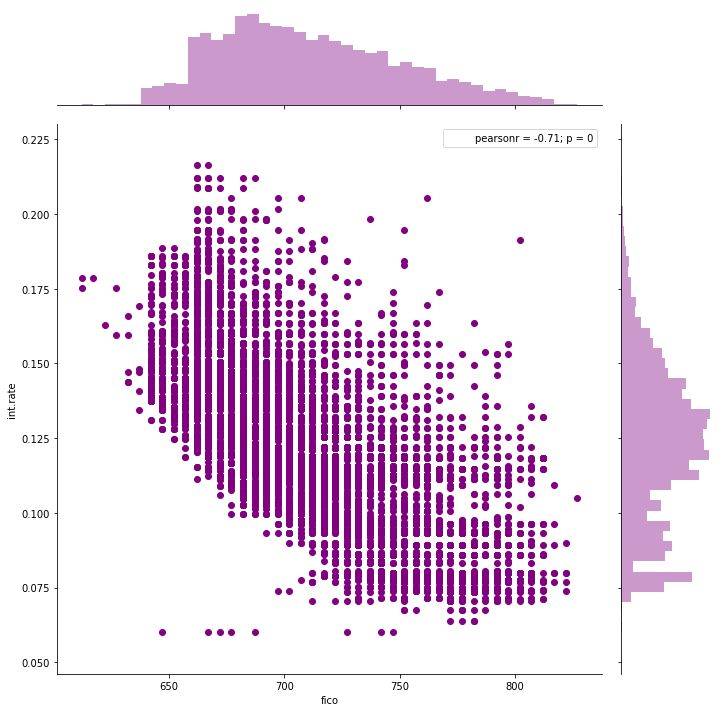

In [20]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple',size=10)
plt.figure(figsize=(10,6))

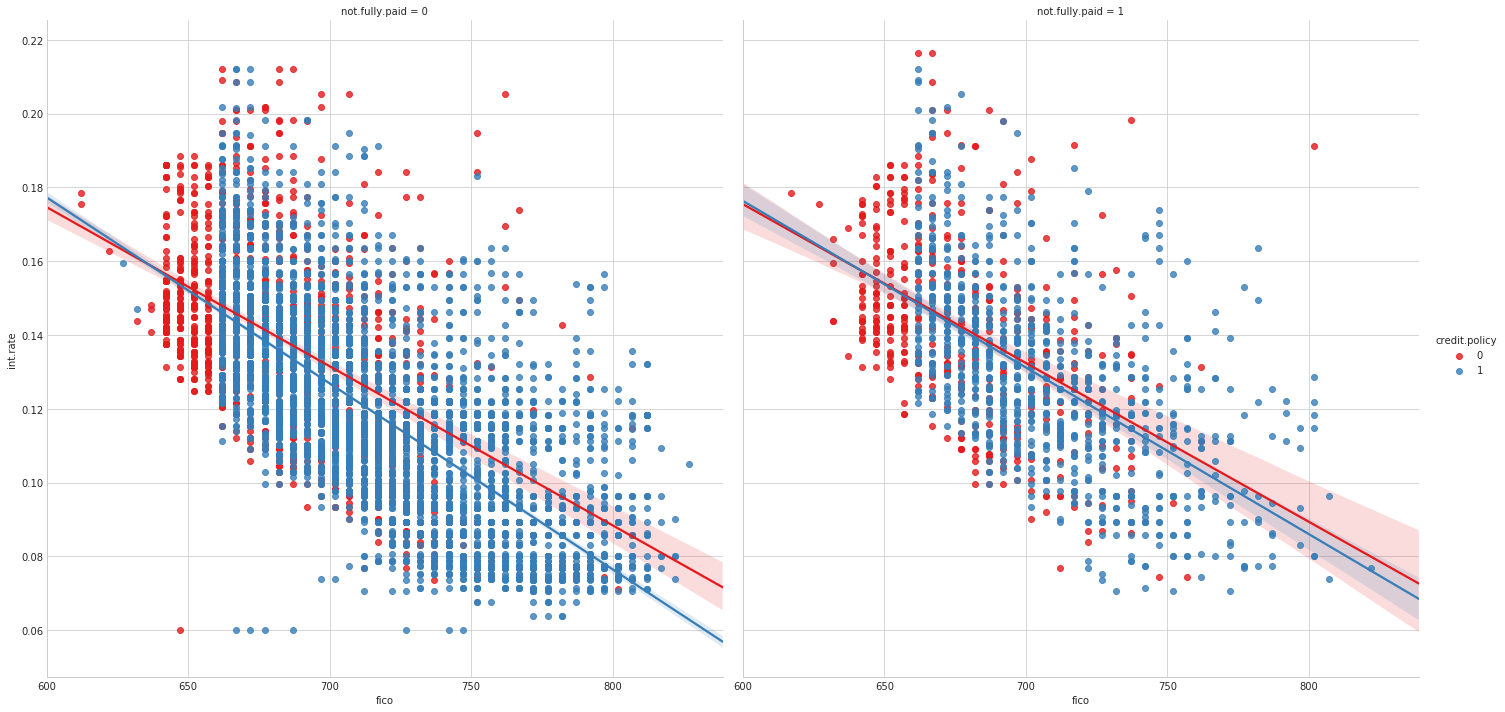

In [21]:
sns.set_style('whitegrid')
sns.set_palette('magma')
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1',size=10)

In [22]:
cat_feats = ['purpose']

In [23]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=1)

In [24]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [25]:
from sklearn.cross_validation import train_test_split

/home/userhadoop/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
x=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.6)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtc= DecisionTreeClassifier()

In [30]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
predictdtc = dtc.predict(x_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predictdtc))
print('\n \n')
cm= confusion_matrix(y_test,predictdtc)
cm = pd.DataFrame(cm.reshape(4,1),index=['TN','TYPE 1 ERROR','TYPE 2 error','TP'],columns=['rate'])
print(cm)

             precision    recall  f1-score   support

          0       0.84      0.85      0.85      4807
          1       0.21      0.21      0.21       940

avg / total       0.74      0.74      0.74      5747


 

              rate
TN            4068
TYPE 1 ERROR   739
TYPE 2 error   747
TP             193


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
predictrfc=rfc.predict(x_test)

In [36]:
print(classification_report(y_test,predictrfc))
print('\n \n')
cm= confusion_matrix(y_test,predictrfc)
cm = pd.DataFrame(cm.reshape(4,1),index=['TN','TYPE 1 ERROR','TYPE 2 error','TP'],columns=['rate'])
print(cm)

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      4807
          1       0.40      0.03      0.06       940

avg / total       0.77      0.83      0.77      5747


 

              rate
TN            4763
TYPE 1 ERROR    44
TYPE 2 error   911
TP              29


In [37]:
error=[]
for i in range(1,50):
    rfci = RandomForestClassifier(n_estimators=i)
    rfci.fit(x_train,y_train)
    ipredictrfc =rfc.predict(x_test) 
    error.append(np.mean(ipredictrfc!=y_test))

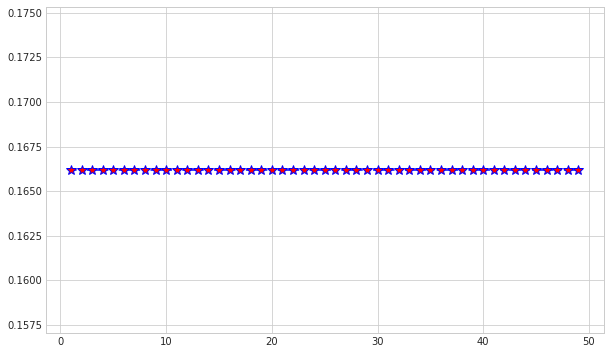

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error,color='blue',marker='*',markersize=10,markerfacecolor='red',linestyle='--')